In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df =pd.read_csv('StudentsPerformance.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
print("catagories in 'gender' variable",end='')
print(df['gender'].unique())

print("catagories in 'race/ethnicity' variable",end='')
print(df['race/ethnicity'].unique())

print("catagories in 'parental level of education' variable",end='')
print(df['parental level of education'].unique())

print("catagories in 'lunch' variable",end='')
print(df['lunch'].unique())

print("catagories in 'test preparation course' variable",end='')
print(df['test preparation course'].unique())

catagories in 'gender' variable['female' 'male']
catagories in 'race/ethnicity' variable['group B' 'group C' 'group A' 'group D' 'group E']
catagories in 'parental level of education' variable["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in 'lunch' variable['standard' 'free/reduced']
catagories in 'test preparation course' variable['none' 'completed']


In [9]:
#defining numerical and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']   
catagorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('\nWe have {} catagorical features : {}'.format(len(catagorical_features),catagorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 catagorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students with full marks in reading:",{reading_full})
print(f"Number of students with full marks in writing:",{writing_full})
print(f"Number of students with full marks in maths:",{math_full})

Number of students with full marks in reading: {np.int64(17)}
Number of students with full marks in writing: {np.int64(14)}
Number of students with full marks in maths: {np.int64(7)}


In [12]:
reading_less_then_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_then_20 = df[df['writing score'] <= 20]['average'].count()
math_less_then_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students with less than 20 in reading:",{reading_less_then_20})
print(f"Number of students with less than 20 in writing:",{writing_less_then_20})
print(f"Number of students with less than 20 in maths:",{math_less_then_20})

Number of students with less than 20 in reading: {np.int64(1)}
Number of students with less than 20 in writing: {np.int64(3)}
Number of students with less than 20 in maths: {np.int64(4)}


HISTOGRAM AND KDE

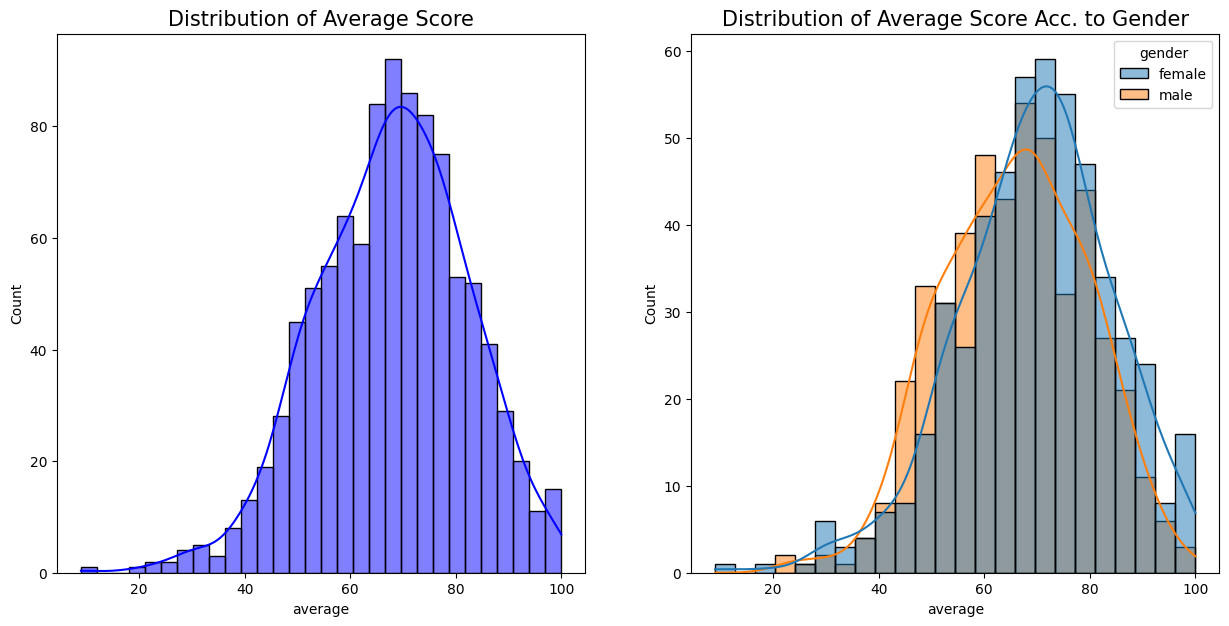

In [13]:
fig, axe=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df['average'],bins =30,kde=True,color='blue')
plt.title('Distribution of Average Score',fontsize=15)
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue='gender')
plt.title('Distribution of Average Score Acc. to Gender',fontsize=15)
plt.show()


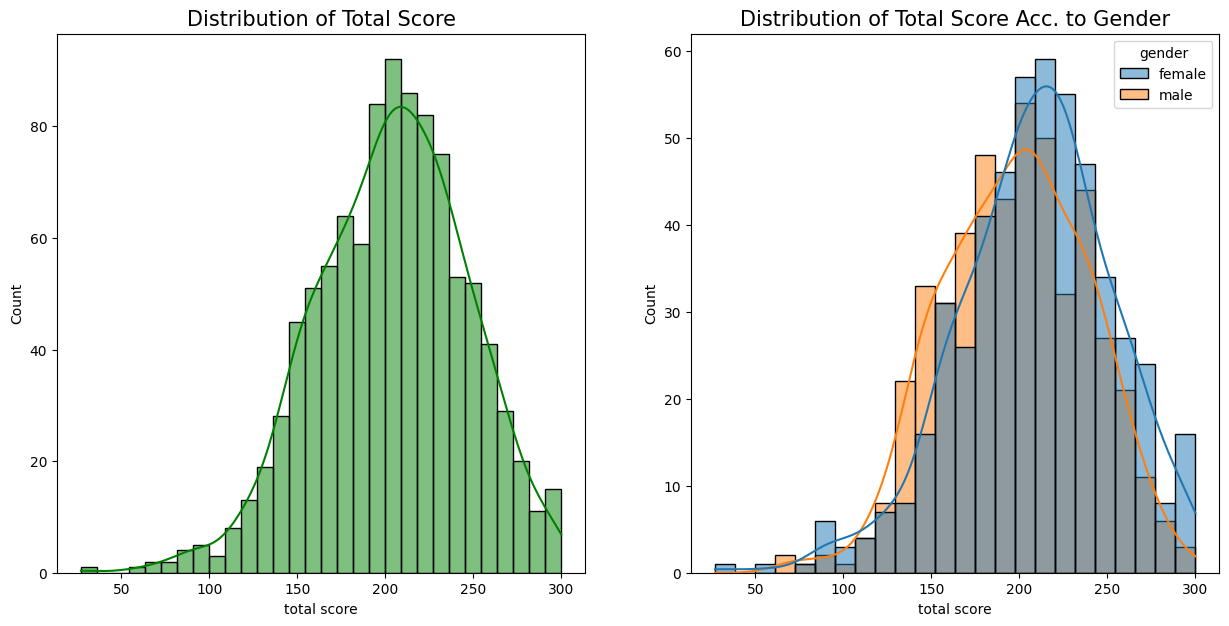

In [14]:
fig, axe=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df['total score'],bins =30,kde=True,color='green')
plt.title('Distribution of Total Score',fontsize=15)
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='gender')
plt.title('Distribution of Total Score Acc. to Gender',fontsize=15)
plt.show()

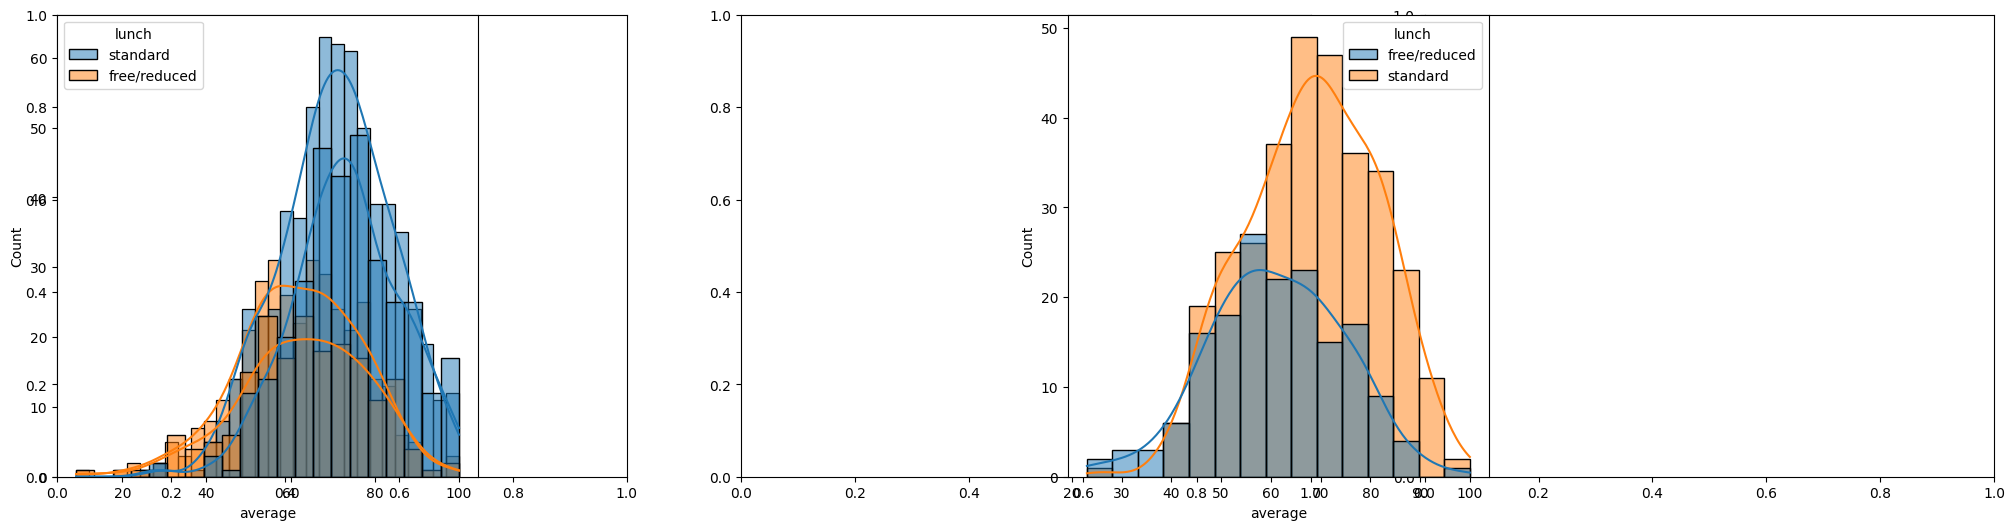

In [15]:
fig, axe=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins =30,kde=True,hue='lunch')
plt.subplot(141)
sns.histplot(data=df[df.gender == 'female'], x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average',kde=True,hue='lunch')
plt.show()

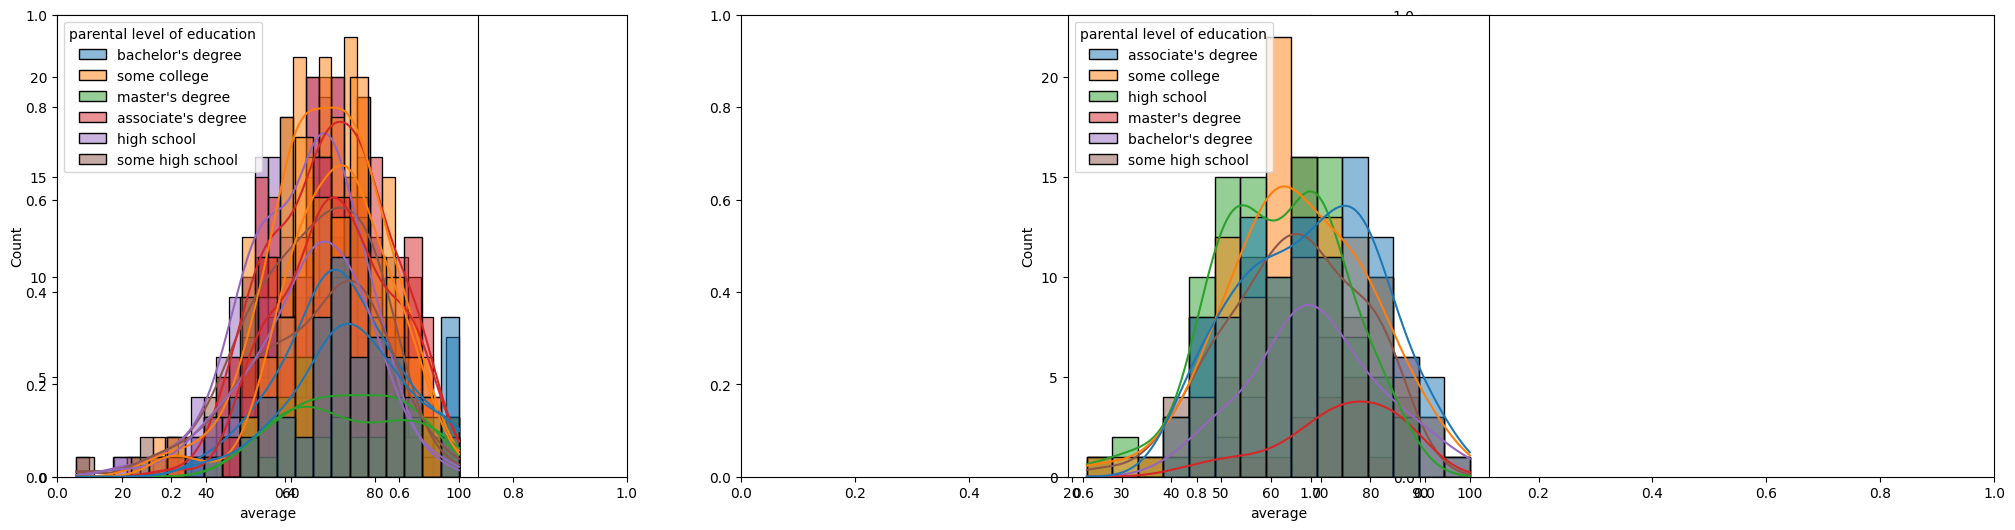

In [16]:
fig, axe=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins =30,kde=True,hue='parental level of education')
plt.subplot(141)
sns.histplot(data=df[df.gender == 'female'], x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average',kde=True,hue='parental level of education')
plt.show()

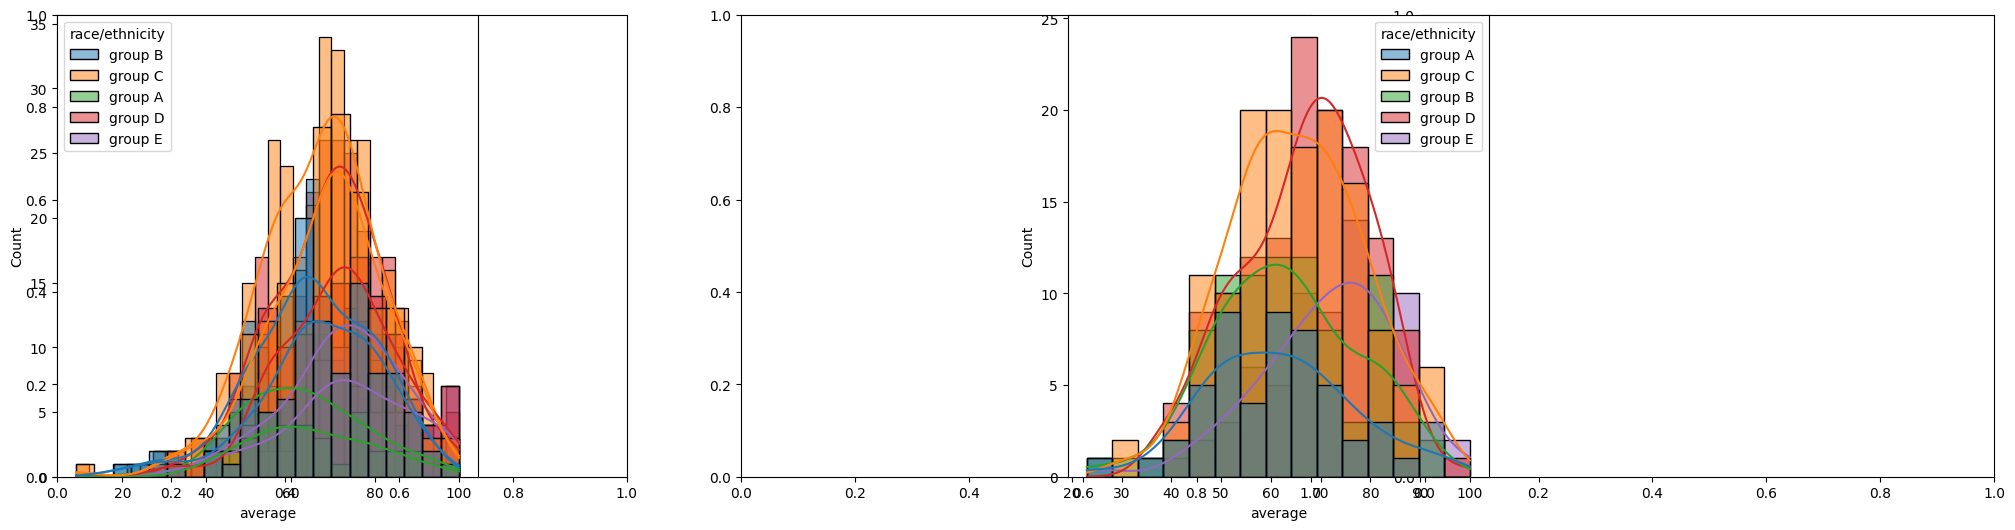

In [20]:
fig, axe=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',bins =30,kde=True,hue='race/ethnicity')
plt.subplot(141)
ax = sns.histplot(data=df[df.gender == 'female'], x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender == 'male'], x='average',kde=True,hue='race/ethnicity')
plt.show()

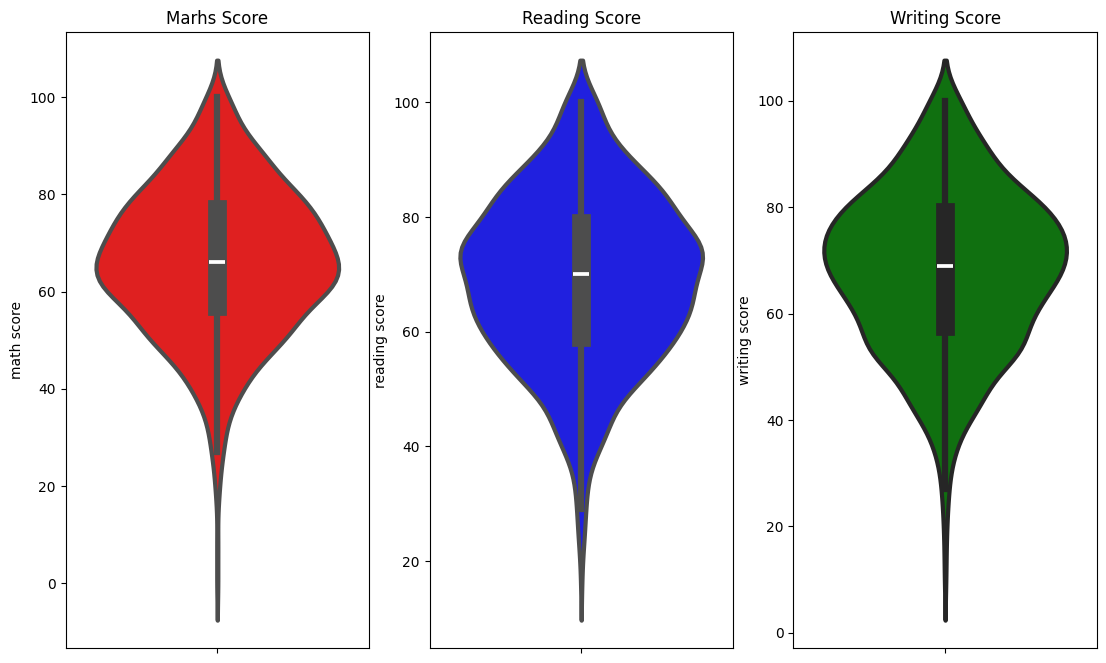

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Marhs Score')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score',data=df,color='green',linewidth=3)
plt.show()


([<matplotlib.patches.Wedge at 0x1d88ab60c10>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'Male'),
  Text(0.062170321584051766, -1.0982417088756626, 'Female')],
 [Text(-0.03391117495305572, 0.5990409269935596, '.51.799999%'),
  Text(0.03391108450039187, -0.5990409321139978, '.48.200001%')])

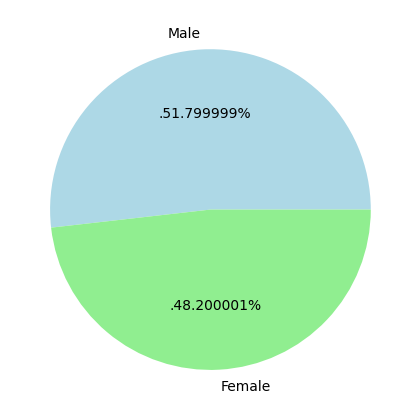

In [24]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Male','Female'
colors=['lightblue','lightgreen']


plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')


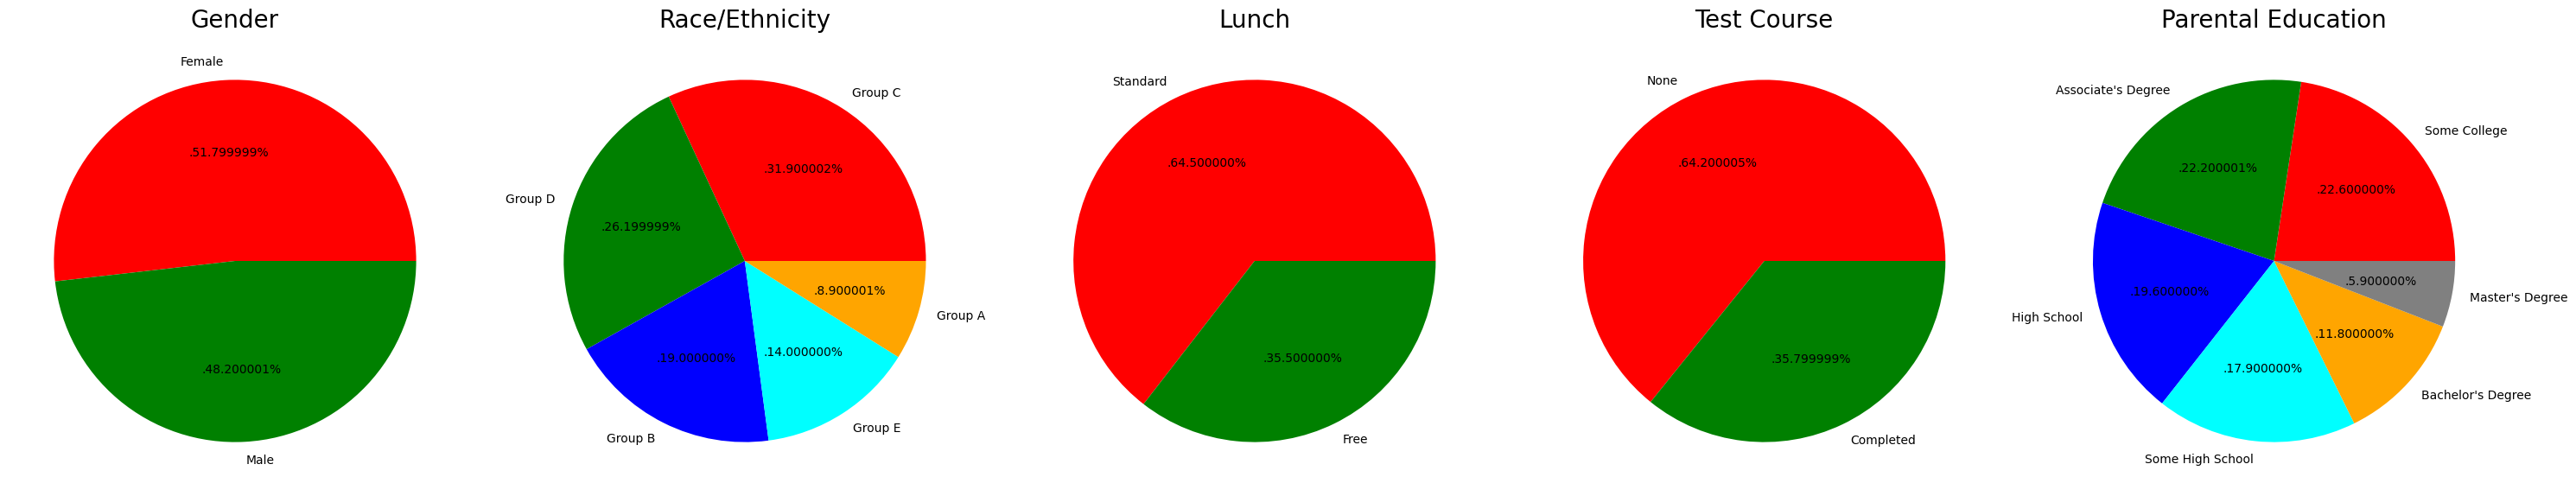

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

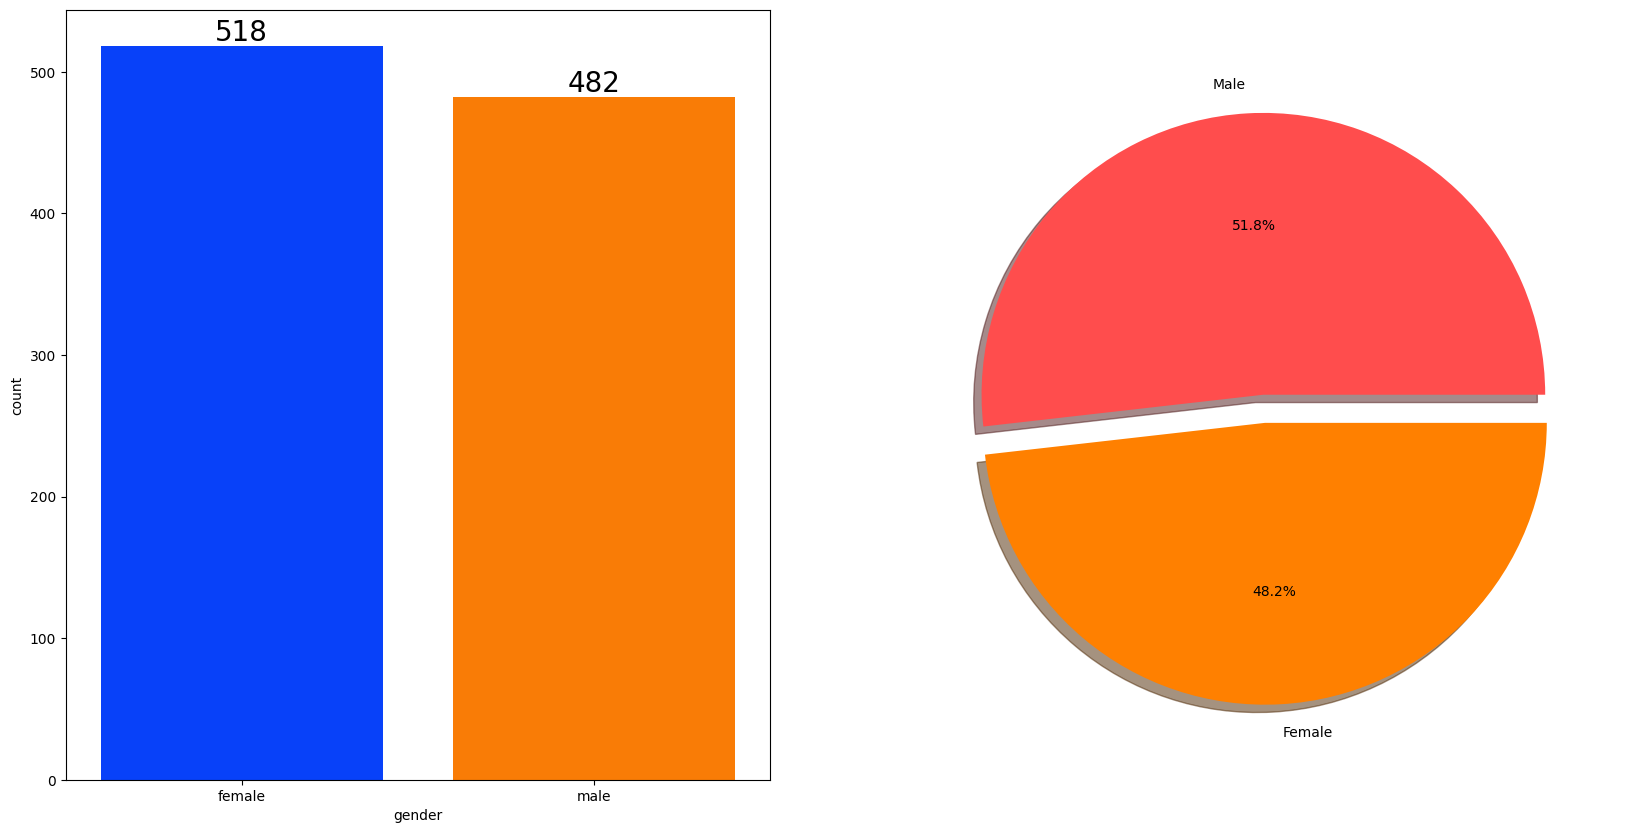

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [22]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [29]:
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


In [30]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


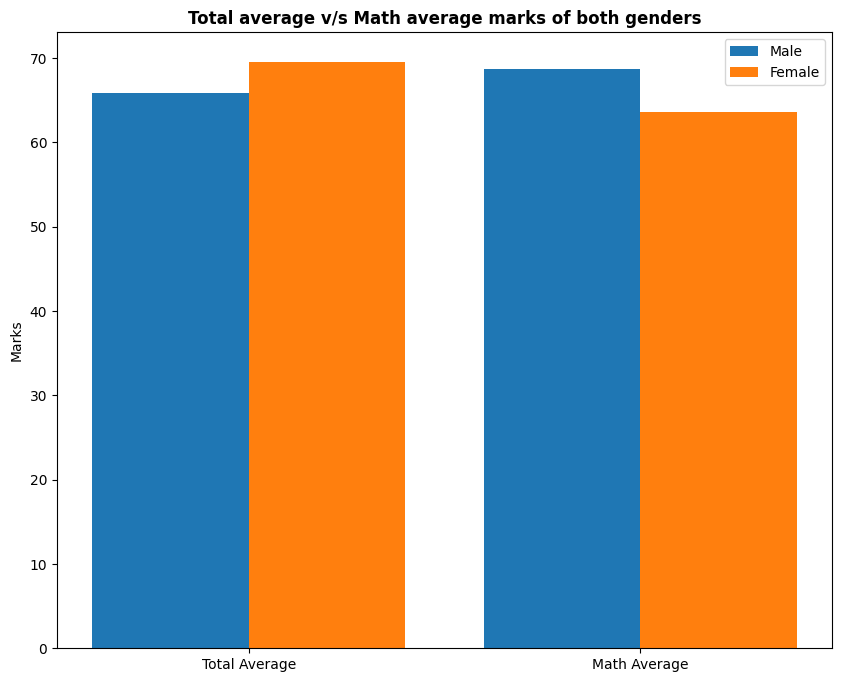

In [31]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [
    gender_group.loc['female', 'average'],
    gender_group.loc['female', 'math score']
]

male_scores = [
    gender_group.loc['male', 'average'],
    gender_group.loc['male', 'math score']
]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


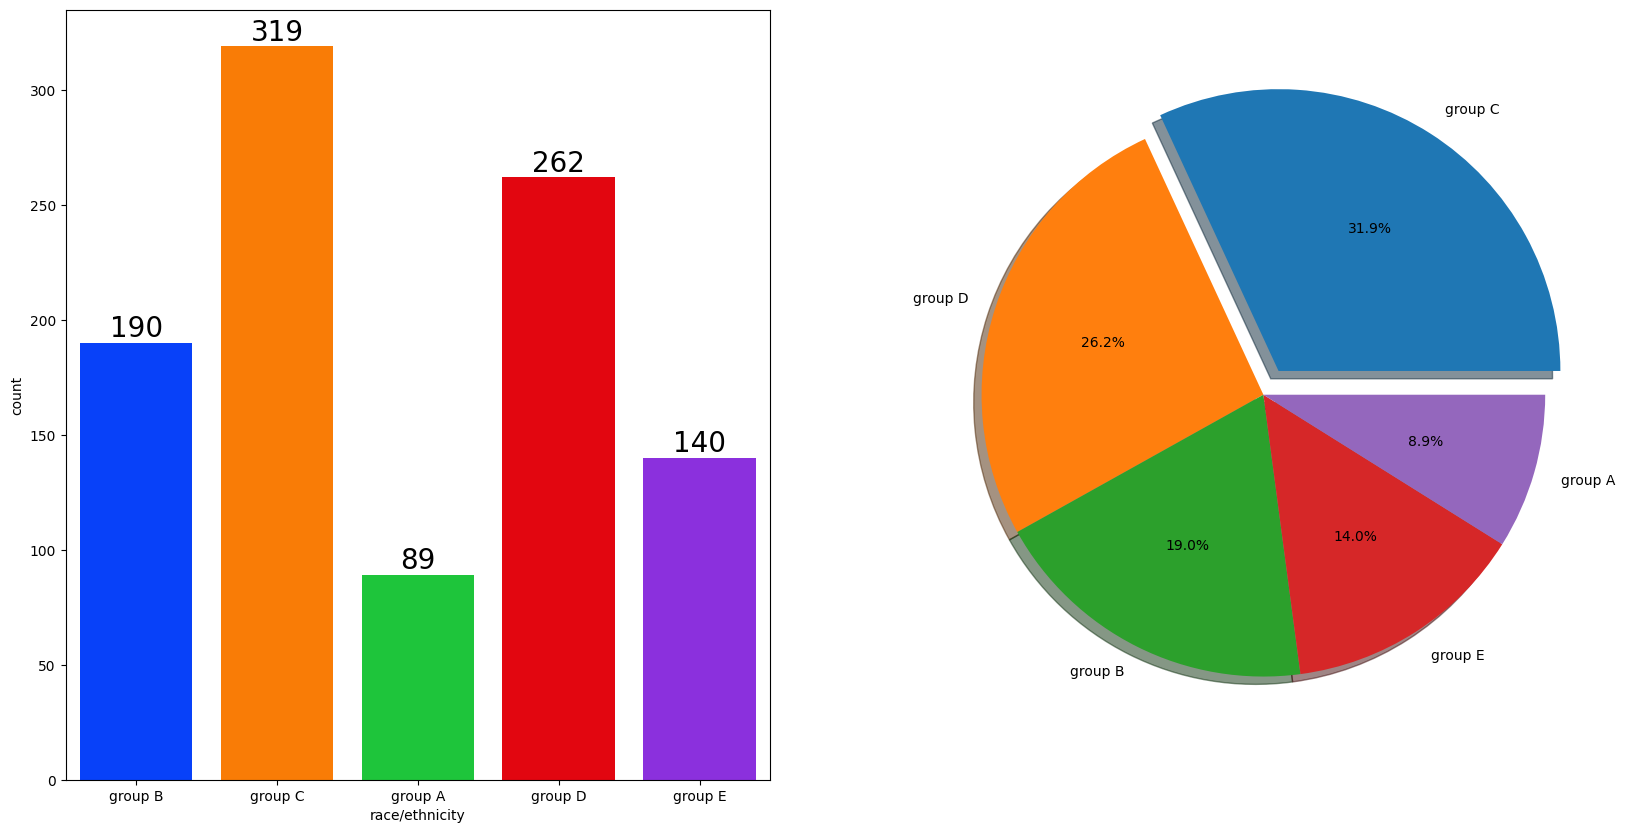

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

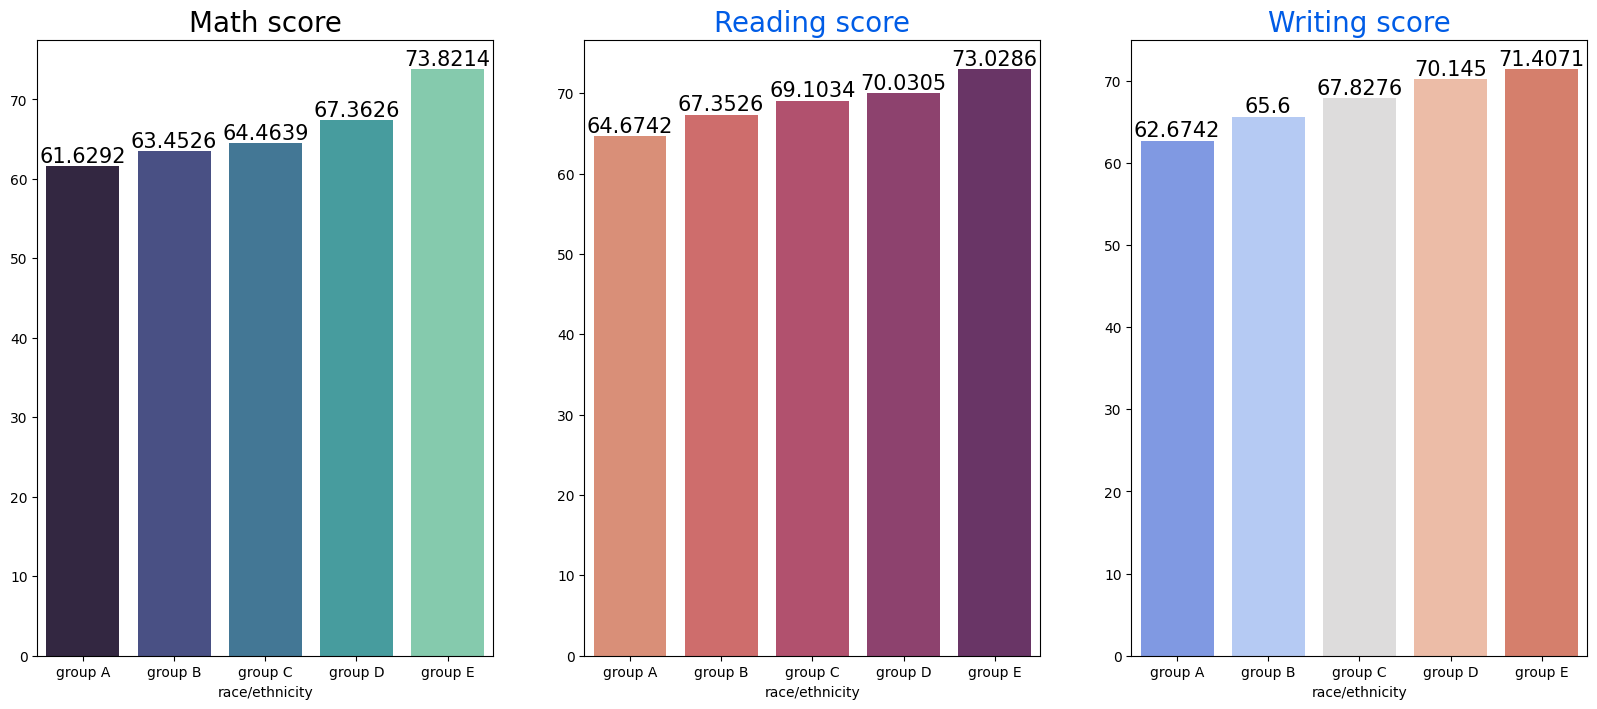

In [34]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

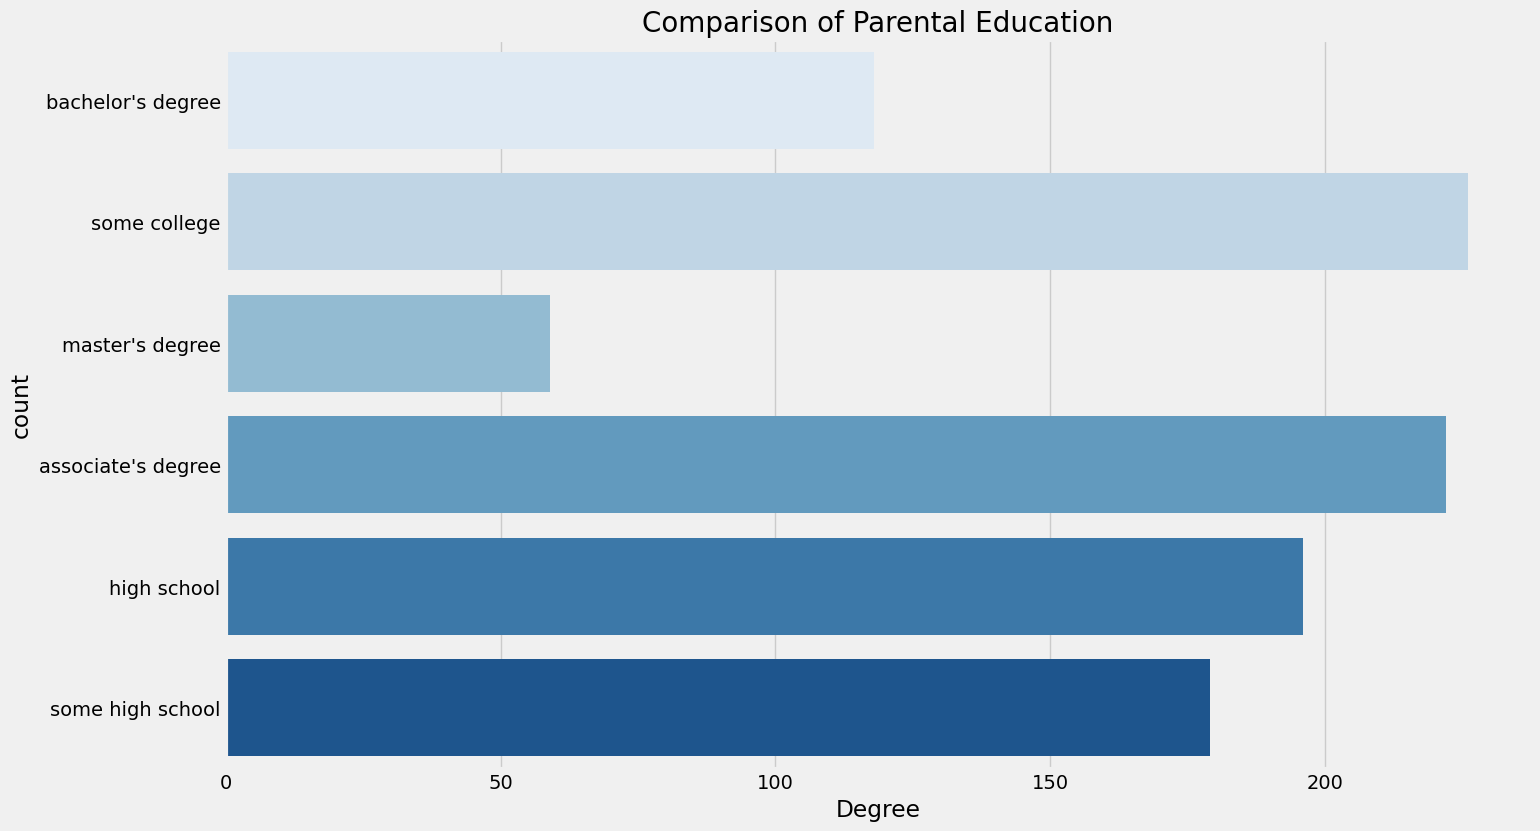

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

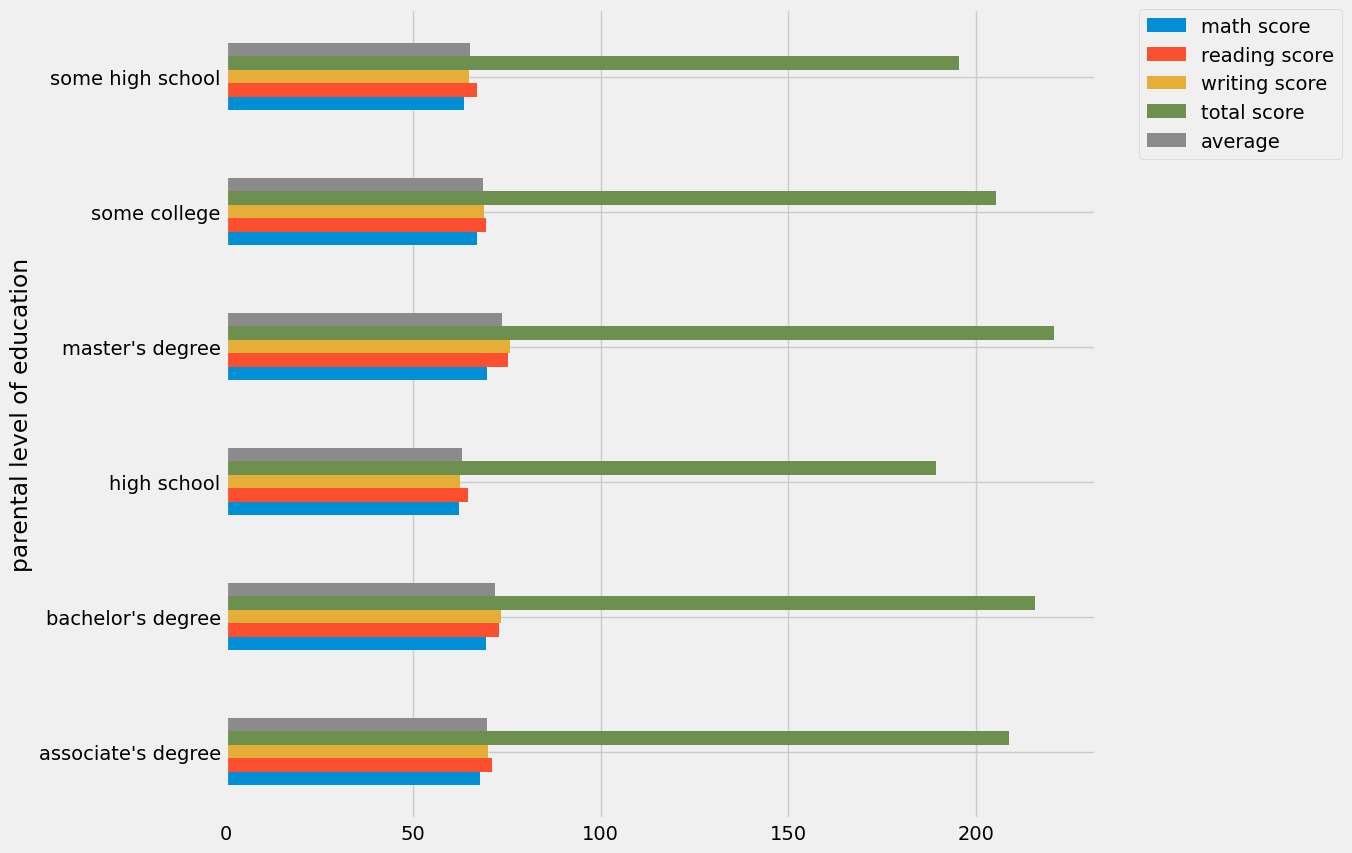

In [40]:
numeric_cols = df.select_dtypes(include='number').columns

df.groupby('parental level of education')[numeric_cols].mean().plot(
    kind='barh', figsize=(10, 10)
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


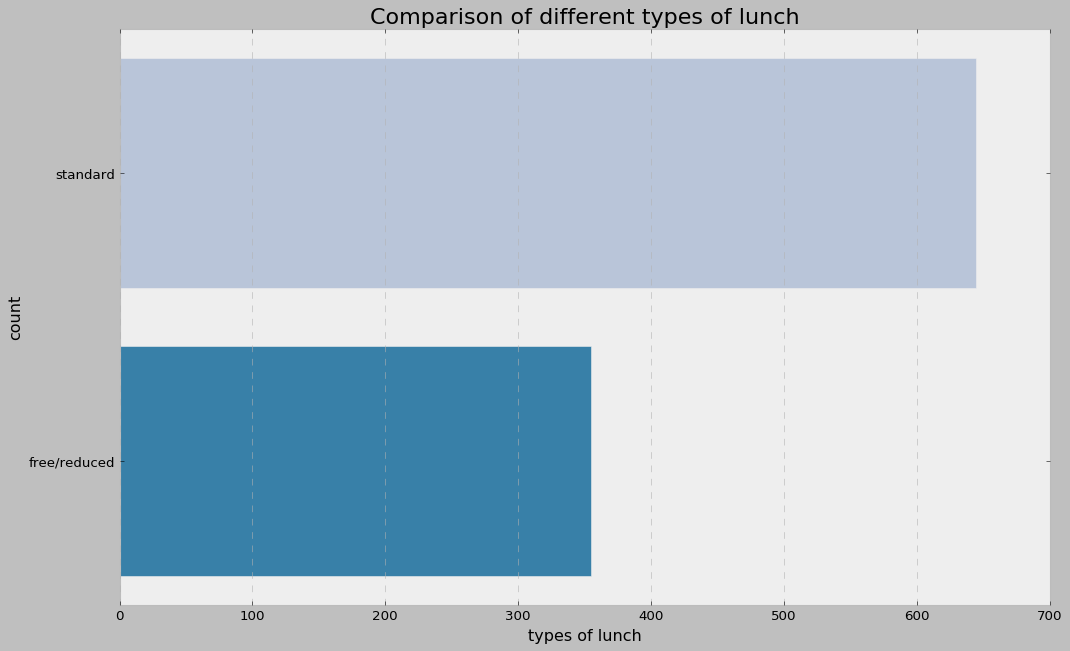

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('_classic_test_patch')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

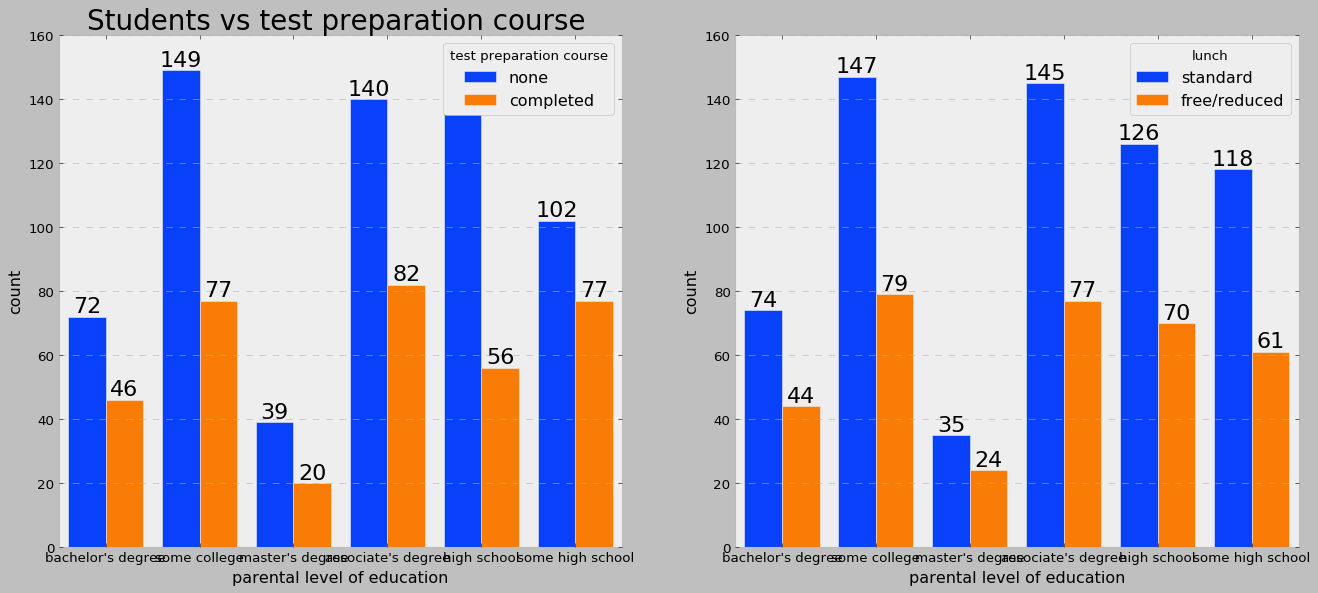

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

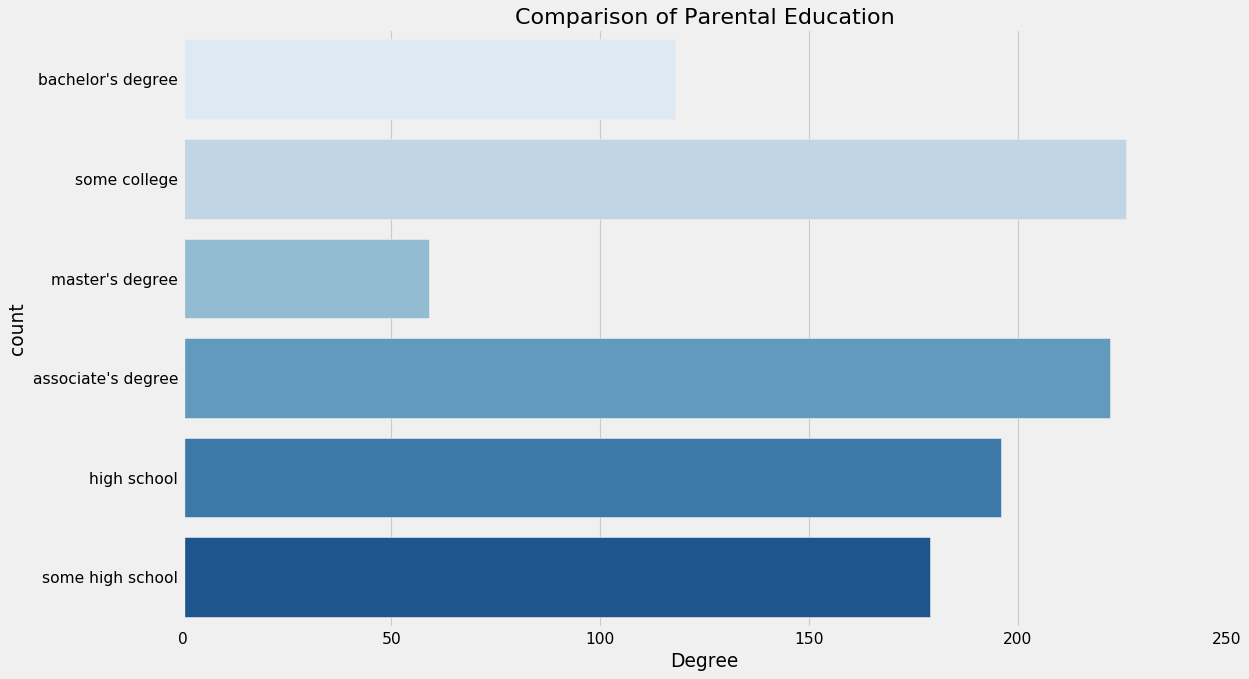

In [52]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

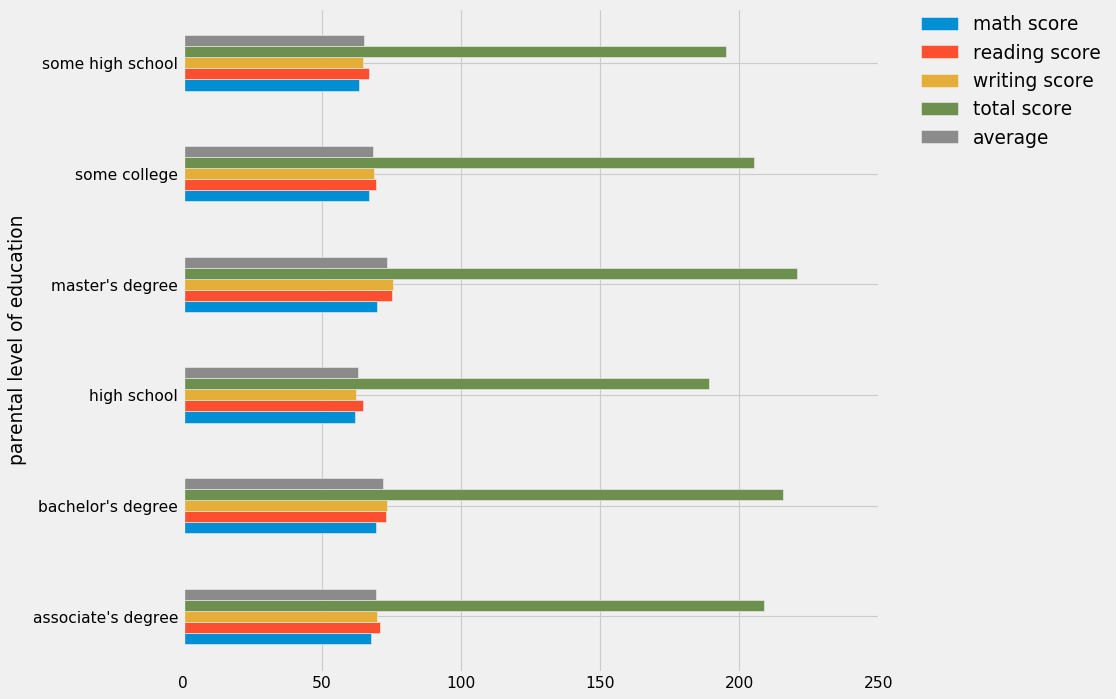

In [54]:
numeric_cols = df.select_dtypes(include='number').columns

df.groupby('parental level of education')[numeric_cols].mean().plot(
    kind='barh', figsize=(10, 10)
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


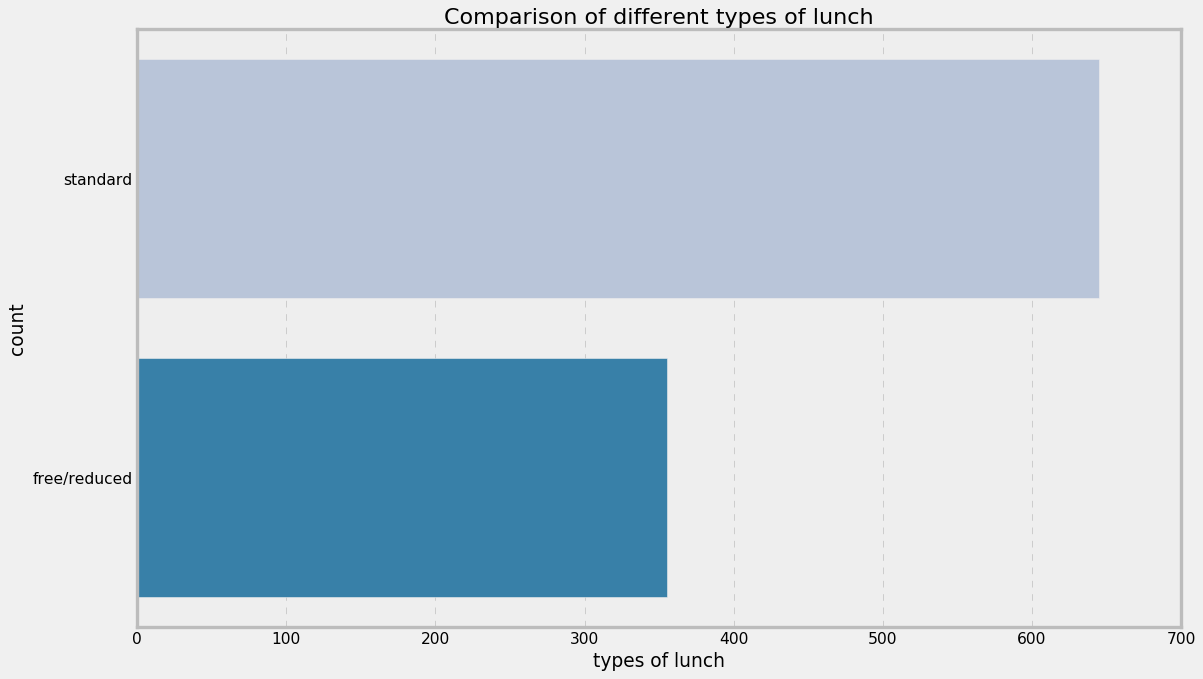

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('bmh')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

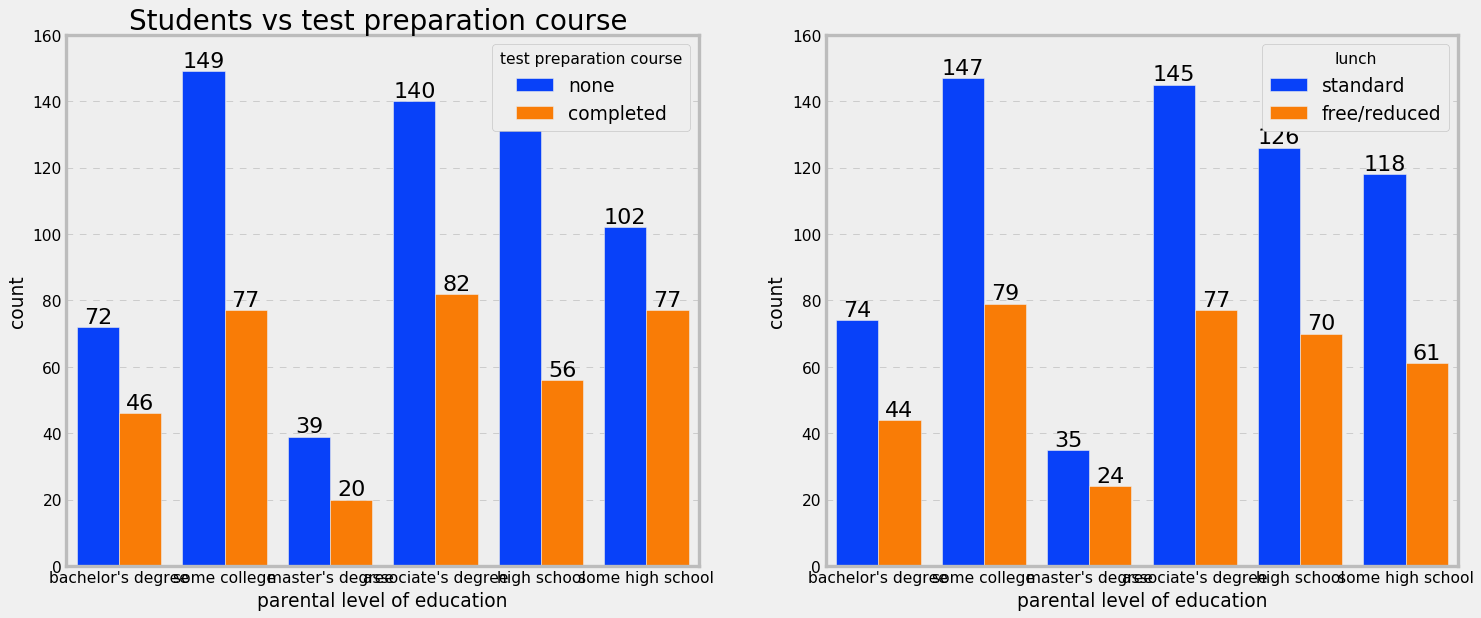

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
        
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

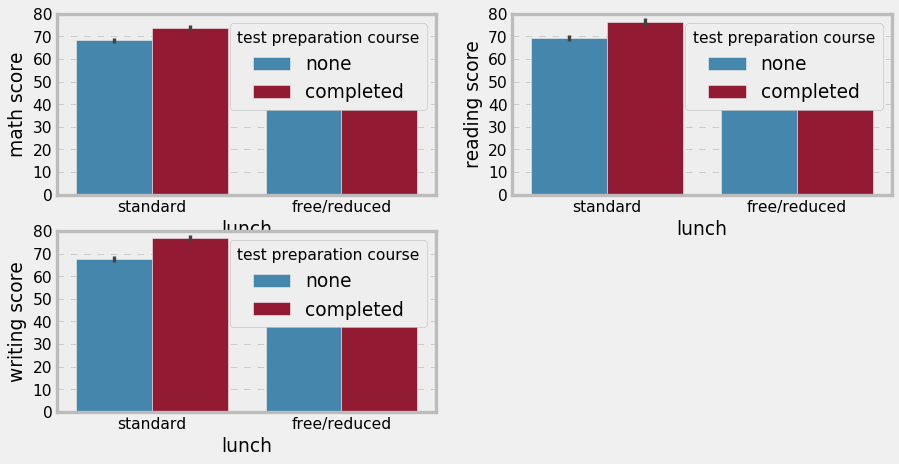

In [60]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

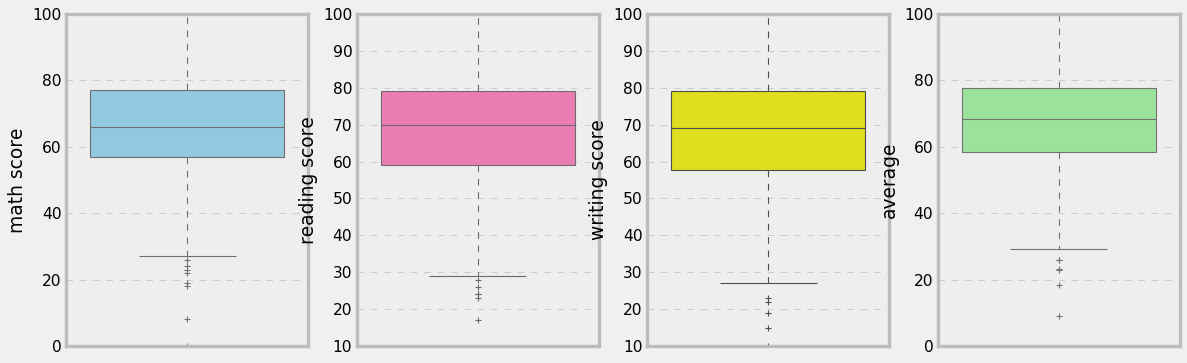

In [61]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

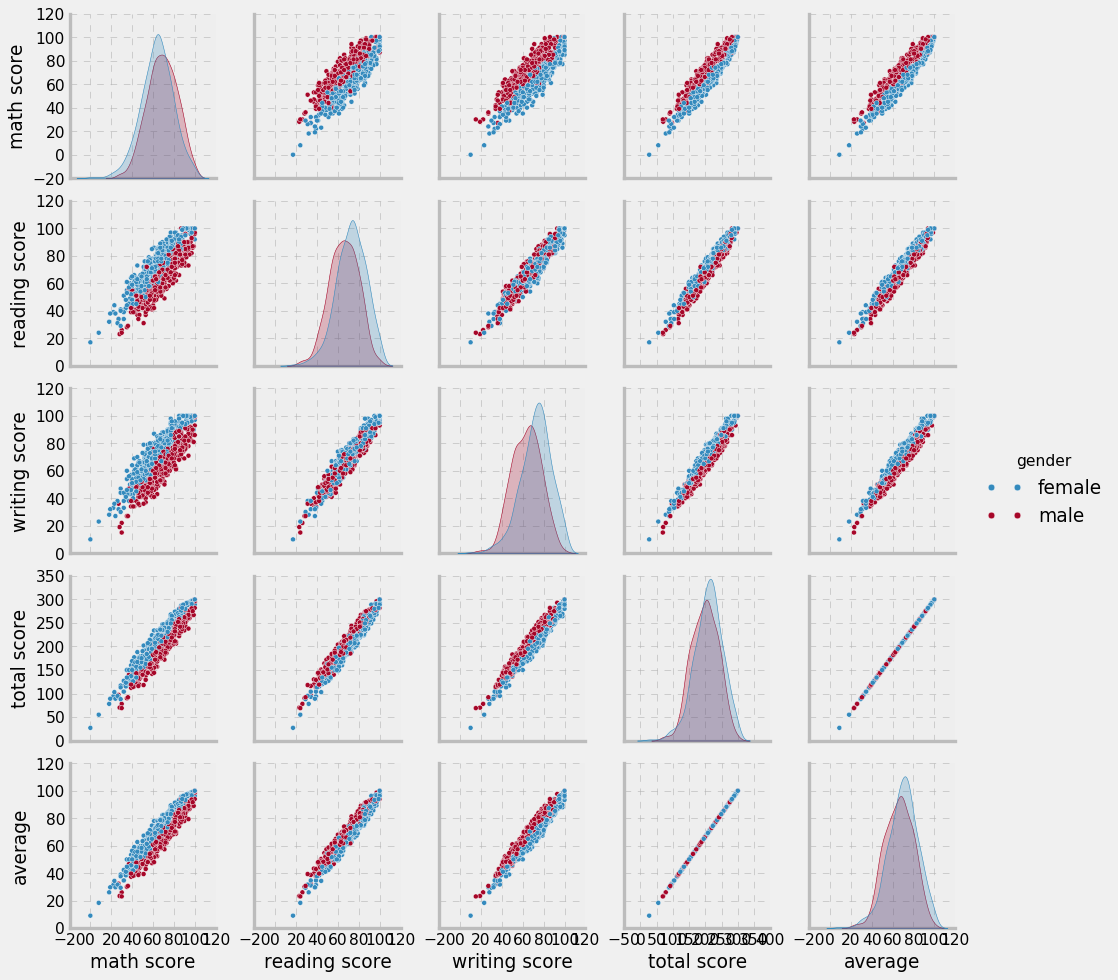

In [62]:
sns.pairplot(df,hue = 'gender')
plt.show()